# Chapter1 
*** 
# Your First Web Scraper
  
<br>  
### Connecting

# Chapter2 
*** 
# Advanced HTML Parsing  
  
<br>

#### bs.find() and bs.find_all() 

 - <font color=pink>find_all(tag, attributes, recursive, text, limit, keywords)</font> 
 - <font color=pink>find(tag, attributes, recursive, text, keywords)</font>  
  - 95% of the time you will need to use only the first two arguments: <font color=green>tag and attributes</font>.  
  - <font color=green>recursive</font> is set to True, <font color=pink>find_all</font> function looks into children, and children’s children, for tags.  
  - default, (recursive is set to True)

name.get_text()  

you’ll get a syntax error due to the nonstandard use of class:  
 - <font color=pink>bs.find_all(class='green')</font> -> syntax error. 
 - <font color=pink>bs.find_all(class_='green')</font> -> class_ 
 - <font color=pink>bs.find_all('', {'class':'green'})</font>  
<br>  

 - BeautifulSoup objects
  - Instances seen in previous code examples as the variable bs
 - Tag objects
  - Retrieved in lists, or retrieved individually by calling find and find_all on a BeautifulSoup object, or drilling down, as follows:  
  bs.div.h1  
 - NavigableString objects
  - Used to represent text within tags, rather than the tags themselves (some functions operate on and produce NavigableStrings, rather than tag objects).
 - Comment object
  - Used to find HTML comments in comment tags, < !--like this one-->.  

#### Navigating Trees  
   
What if you need to find a tag based on its location in a document?
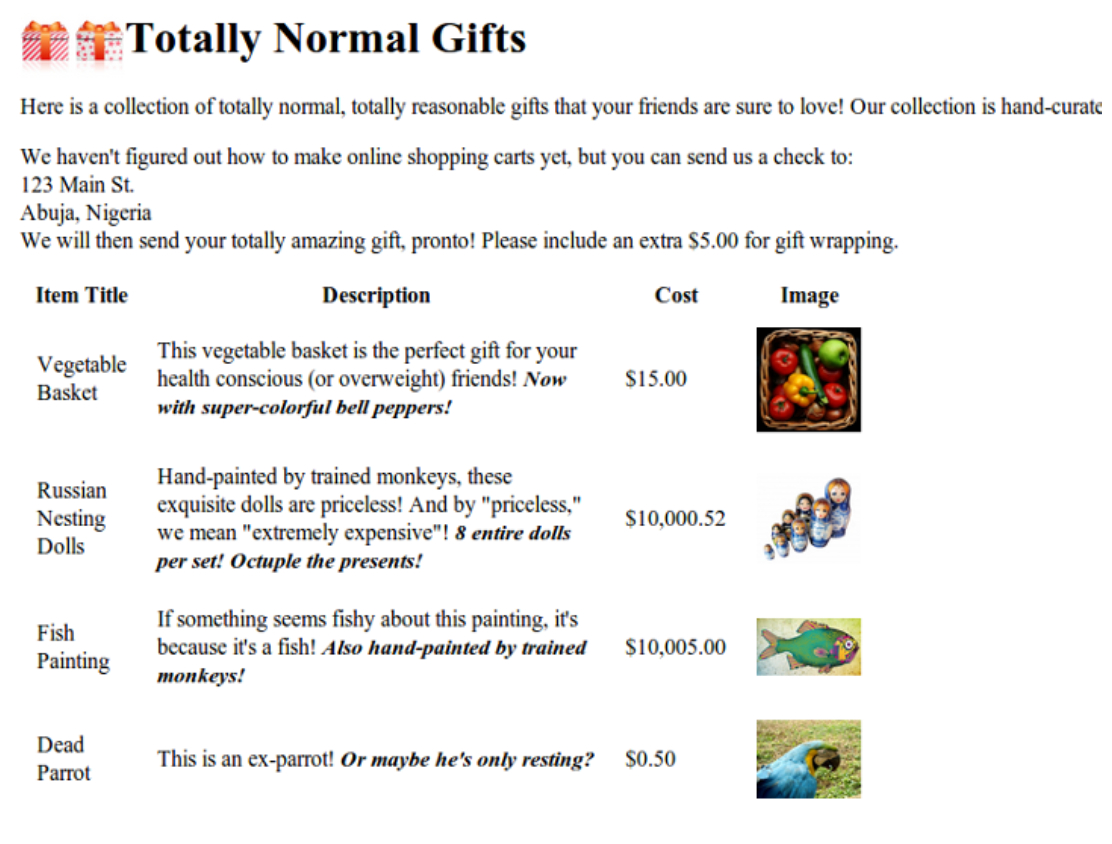



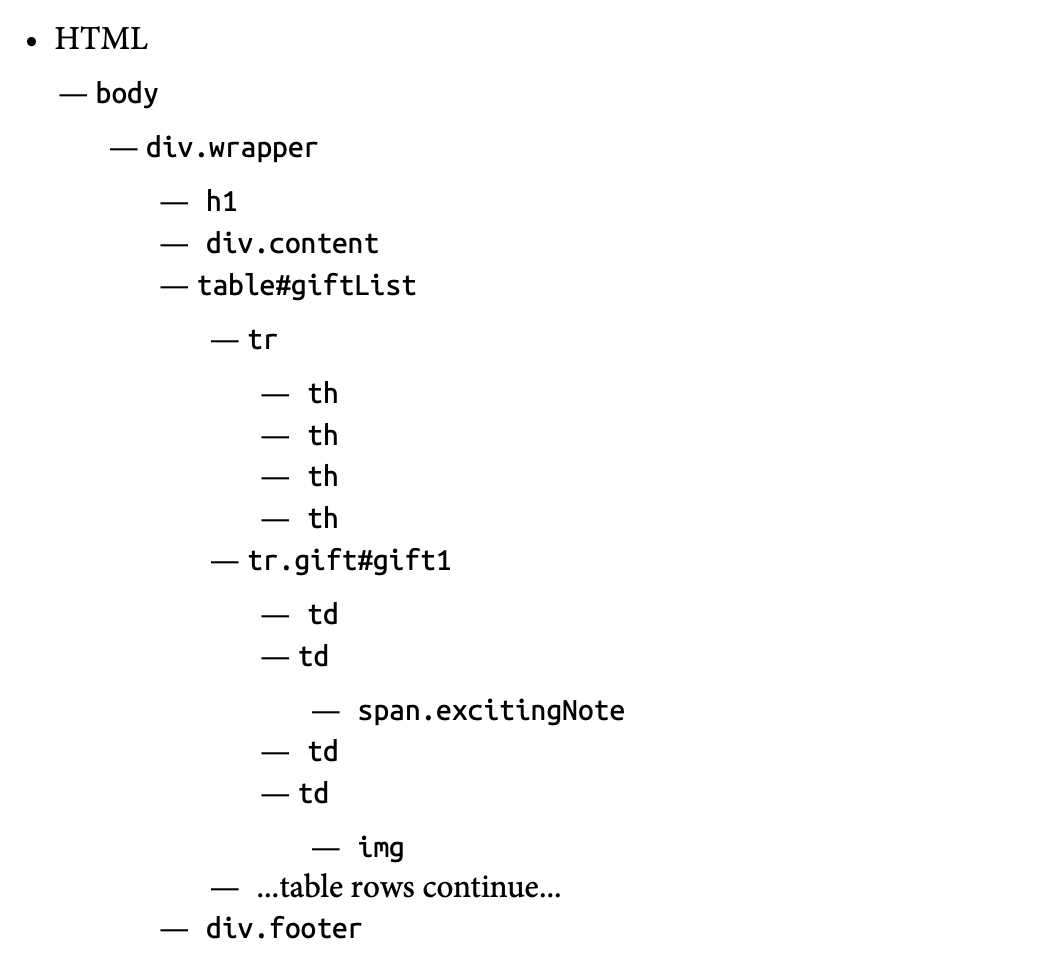

In [1]:
# You can grab the entire page
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen('http://www.pythonscraping.com/pages/warandpeace.html')
bs = BeautifulSoup(html, "html.parser")

In [2]:
# bs.find_all(tagName, tagAttributes)
# Calling .get_text() should always be the last thing you do
nameList = bs.findAll('span', {'class': 'green'})
for name in nameList:
    print(name.get_text())

Anna
Pavlovna Scherer
Empress Marya
Fedorovna
Prince Vasili Kuragin
Anna Pavlovna
St. Petersburg
the prince
Anna Pavlovna
Anna Pavlovna
the prince
the prince
the prince
Prince Vasili
Anna Pavlovna
Anna Pavlovna
the prince
Wintzingerode
King of Prussia
le Vicomte de Mortemart
Montmorencys
Rohans
Abbe Morio
the Emperor
the prince
Prince Vasili
Dowager Empress Marya Fedorovna
the baron
Anna Pavlovna
the Empress
the Empress
Anna Pavlovna's
Her Majesty
Baron
Funke
The prince
Anna
Pavlovna
the Empress
The prince
Anatole
the prince
The prince
Anna
Pavlovna
Anna Pavlovna


In [3]:
titles = bs.find_all(['h1', 'h2','h3','h4','h5','h6'])
print([title for title in titles])

[<h1>War and Peace</h1>, <h2>Chapter 1</h2>]


In [4]:
allText = bs.find_all('span', {'class':{'green', 'red'}})
print([text for text in allText])

[<span class="red">Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news.</span>, <span class="green">Anna
Pavlovna Scherer</span>, <span class="green">Empress Marya
Fedorovna</span>, <span class="green">Prince Vasili Kuragin</span>, <span class="green">Anna Pavlovna</span>, <span class="green">St. Petersburg</span>, <span class="red">If you have nothing better to do, Count [or Prince], and if the
prospect of spending an evening with a poor invalid is not too
terrible, I shall be very charmed to see you tonight between 7 and 10-
Annette Scherer.</span>, <span class="red">Heavens! w

In [5]:
nameList = bs.find_all(text='the prince')
print(len(nameList))

7


In [6]:
title = bs.find_all(id='title', class_='text')
print([text for text in allText])

[<span class="red">Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news.</span>, <span class="green">Anna
Pavlovna Scherer</span>, <span class="green">Empress Marya
Fedorovna</span>, <span class="green">Prince Vasili Kuragin</span>, <span class="green">Anna Pavlovna</span>, <span class="green">St. Petersburg</span>, <span class="red">If you have nothing better to do, Count [or Prince], and if the
prospect of spending an evening with a poor invalid is not too
terrible, I shall be very charmed to see you tonight between 7 and 10-
Annette Scherer.</span>, <span class="red">Heavens! w

In [7]:
title = bs.find(id='title')
print([text for text in allText])

[<span class="red">Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news.</span>, <span class="green">Anna
Pavlovna Scherer</span>, <span class="green">Empress Marya
Fedorovna</span>, <span class="green">Prince Vasili Kuragin</span>, <span class="green">Anna Pavlovna</span>, <span class="green">St. Petersburg</span>, <span class="red">If you have nothing better to do, Count [or Prince], and if the
prospect of spending an evening with a poor invalid is not too
terrible, I shall be very charmed to see you tonight between 7 and 10-
Annette Scherer.</span>, <span class="red">Heavens! w

#### Dealing with children and other descendants  
***  
 - If you want to find only descendants that are children, you can use the  <font color=pink>.children tag</font>:  
 - <font color=green>descendants()</font> function instead of the <font color=green>children()</font> function, about two dozen tags would be found within the table and printed, including img tags, span tags, and individual td tags

In [16]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/page3.html')
bs = BeautifulSoup(html, 'html.parser')

for child in bs.find('table',{'id':'giftList'}).children:
    print('============')
    print(child)



<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>


<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>


<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>


<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg"/>


#### Dealing with siblings  
***  
 - <font color=pink>next_siblings()</font> function makes it trivial to collect data from tables, especially ones with title rows.  
 - The output of this code is to print all rows of products from the product table, except for the first title row.  
  - Why does the title row get skipped?  
    - Objects cannot be siblings with themselves.  
    - So, by selecting the title row and calling <font color=pink>next_siblings()</font>, you can select all the rows in the table, without selecting the title row itself.  

 - next_sibling and previous_sibling functions, which perform nearly the same function as next_siblings and previous_siblings, except they return a single tag rather than a list of them.

In [17]:
# 
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/page3.html')
bs = BeautifulSoup(html, 'html.parser')

for sibling in bs.find('table', {'id':'giftList'}).tr.next_siblings:
    print('============')
    print(sibling)




<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>


<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>


<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg"/>
</td></tr>


<tr class="gift" id="gift4"><td>
Dead Parrot
</td><td>
This is an ex-parr

#### Dealing with parents  
***  
 - When scraping pages, you will likely discover that you need to find parents of tags.  
 -  you start by looking at the top layer of tags.

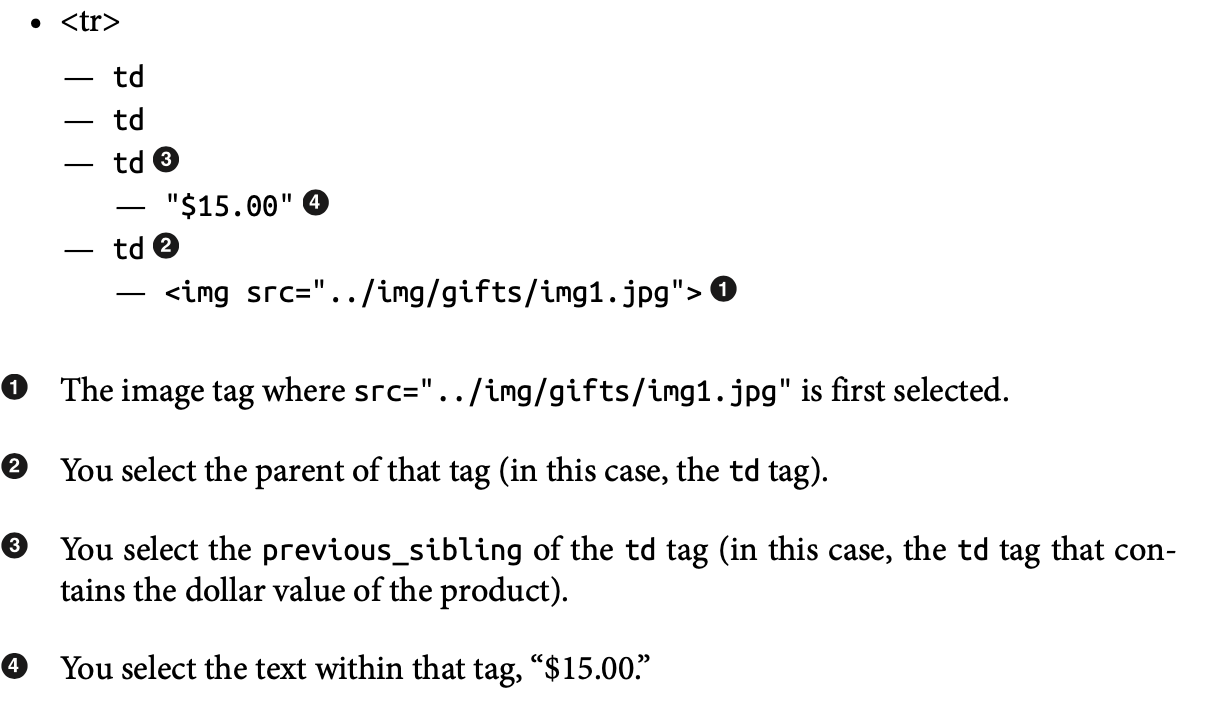


In [24]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/page3.html')
bs = BeautifulSoup(html, 'html.parser')
print(bs.find('img',
              {'src':'../img/gifts/img1.jpg'})
      .parent.previous_sibling.get_text())


$15.00



#### Regular Expressions  
***  
#### Regular Expressions and BeautifulSoup  
***  
 - sites often have hidden images, blank images used for spacing and aligning elements, and other random image tags you might not be aware of.   
 - 

In [40]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

html = urlopen('http://www.pythonscraping.com/pages/page3.html')
bs = BeautifulSoup(html, 'html.parser')
images = bs.find_all('img', {'src':re.compile('\.\.\/img\/gifts/img.*\.jpg')})
for image in images: 
    print(image['src'])
    print(image.parent.previous_sibling.get_text())
#     print(bs.find('img',
#               {'src':re.compile('\.\.\/img\/gifts/img.*\.jpg')})
#       .parent.previous_sibling.get_text())

../img/gifts/img1.jpg

$15.00

../img/gifts/img2.jpg

$10,000.52

../img/gifts/img3.jpg

$10,005.00

../img/gifts/img4.jpg

$0.50

../img/gifts/img6.jpg

$1.50



#### Accessing Attributes  
***  
 - However, often in web scraping you’re not looking for the content of a tag; you’re looking for its attribute.   
 - URL it is pointing to is contained within the href attribute; or the img tag, where the target image is contained within the src attribute.
 - Python list of attributes can be automatically accessed by calling this:
<font color=pink>myTag.attrs</font>  
- 
myImgTag.attrs['src']


#### Lambda Expressions  
***  
 - __<font color=green>lambda expression</font>__ is a function that is passed into another function as a variable.  
 - instead of defining a function as f(x, y), you may define a function as f(g(x), y) or even f(g(x), h(x)).  
 - mbda function can be any function that returns a True or False value, you can even combine them with regular expressions to find tags with an attribute matching a certain string pattern.

In [12]:
# retrieves all tags that have exactly two attributes
bs.find_all(lambda tag: len(tag.attrs) == 2)

[<img src="../img/gifts/logo.jpg" style="float:left;"/>,
 <tr class="gift" id="gift1"><td>
 Vegetable Basket
 </td><td>
 This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
 <span class="excitingNote">Now with super-colorful bell peppers!</span>
 </td><td>
 $15.00
 </td><td>
 <img src="../img/gifts/img1.jpg"/>
 </td></tr>,
 <tr class="gift" id="gift2"><td>
 Russian Nesting Dolls
 </td><td>
 Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
 </td><td>
 $10,000.52
 </td><td>
 <img src="../img/gifts/img2.jpg"/>
 </td></tr>,
 <tr class="gift" id="gift3"><td>
 Fish Painting
 </td><td>
 If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
 </td><td>
 $10,005.00
 </td><td>
 <img src="../img/gifts/img3.jpg"/>
 </td>

In [15]:
# Lambda functions are so useful you can even use to replace existing BeautifulSoup functions:
bs.find_all(lambda tag: tag.get_text() == 'Or maybe he\'s only resting?')

[<span class="excitingNote">Or maybe he's only resting?</span>]

In [14]:
bs.find_all('', text='Or maybe he\'s only resting?')

["Or maybe he's only resting?"]